In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

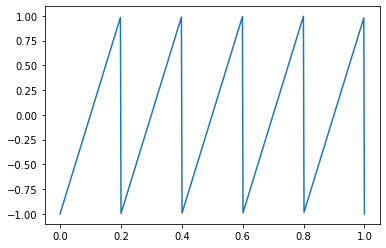

In [2]:
t = np.linspace(0, 1, 500)
plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t))

<StemContainer object of 3 artists>

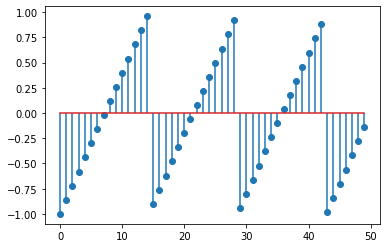

In [3]:
n = np.arange(0, 50, 1)
dt=0.07/50
plt.stem(n, signal.sawtooth(2 * np.pi * 50 * dt*n))

(-2.0, 2.0)

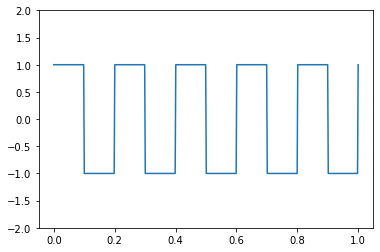

In [4]:
t = np.linspace(0, 1, 500)
fig, ax=plt.subplots()
ax.plot(t, signal.square(2 * np.pi * 5 * t))
ax.set_ylim(-2, 2)

<StemContainer object of 3 artists>

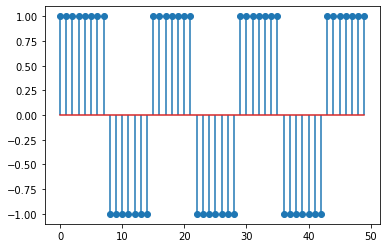

In [5]:
n = np.arange(0, 50, 1)
dt=0.07/50
plt.stem(n, signal.square(2 * np.pi *50*n*dt))

<StemContainer object of 3 artists>

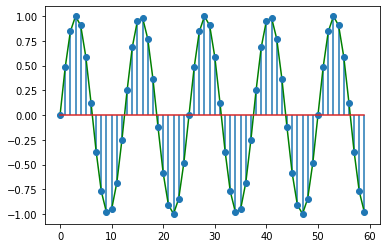

In [6]:
n=np.arange(0,60, 1)
dt=0.08/50
fig, ax=plt.subplots()
ax.plot(n, np.sin(2*np.pi*50*n*dt), color="green")
ax.stem(n, np.sin(2*np.pi*50*n*dt))

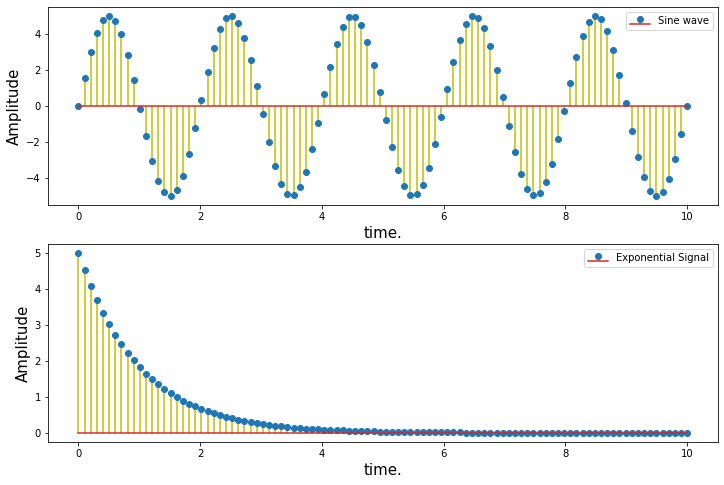

In [7]:
# Sine wave
n = np.linspace(0, 10, 100)
amp = 5 # Amplitude
f = 50
x = amp * np.sin(2 * np.pi * f * n)

# Exponential Signal
x_ = amp * np.exp(-n)
fig, ax=plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

ax[0].stem(n, x, 'yo', label='Sine wave')

ax[0].set_xlabel('time.', fontsize=15)
ax[0].set_ylabel('Amplitude', fontsize=15)
ax[0].legend(fontsize=10, loc='upper right')

ax[1].stem(n, x_, 'yo', label='Exponential Signal')

ax[1].set_xlabel('time.', fontsize=15)
ax[1].set_ylabel('Amplitude', fontsize=15)
ax[1].legend(fontsize=10, loc='upper right')

### Unit Step Signal

In [8]:
def unit_step(delay, n):
    amp=[]
    for sample in n:
        if sample<delay:
            amp.append(0)
        else:
            amp.append(1)
    return amp

<StemContainer object of 3 artists>

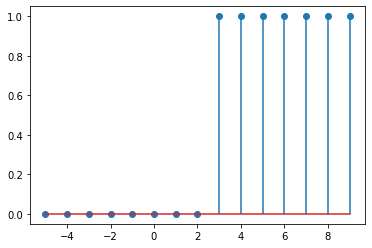

In [9]:
delay=3
n=np.arange(-5, 10, 1)
fun=unit_step(delay, n)
fig, ax=plt.subplots()
ax.stem(n, fun)

### Unit Impulse

In [10]:
def unit_impulse(delay, n):
    amp=[]
    for sample in n:
        if sample==delay:
            amp.append(1)
        else:
            amp.append(0)
    return amp

<StemContainer object of 3 artists>

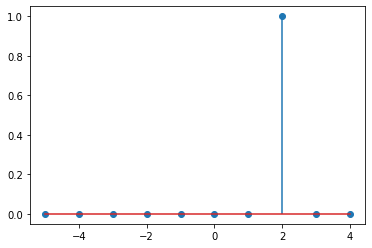

In [11]:
delay=2
n=np.arange(-5, 5)
func=unit_impulse(delay, n)
fig, ax=plt.subplots()
ax.stem(n, func)

### Unit Ramp

In [12]:
def unit_ramp(delay, n):
    amp=[]
    for sample in n:
        if sample<delay:
            amp.append(0)
        else:
            amp.append(sample)
    return amp

<StemContainer object of 3 artists>

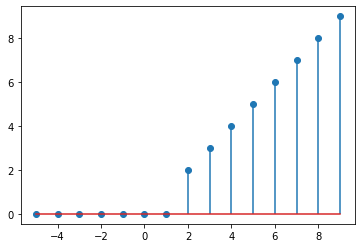

In [13]:
delay=2
n=np.arange(-5, 10)
func=unit_ramp(delay, n)
fig, ax=plt.subplots()
ax.stem(n, func)

### Exponential

In [14]:
def expo(delay, n):
    amp=[]
    for sample in n:
        if sample<delay:
            amp.append(0)
        else:
            amp.append(0.6**sample)
    return amp

<StemContainer object of 3 artists>

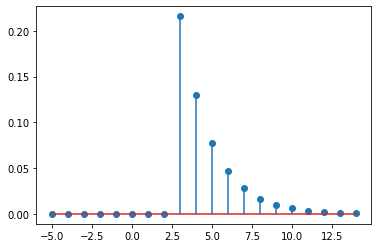

In [15]:
delay=3
n=np.arange(-5, 15, 1)
func=expo(delay, n)
fig, ax=plt.subplots()
ax.stem(n, func)

### Sinusoidal

In [16]:
def sinusoidal(k, n):
    dt=0.07/50
    amp=[]
    for sample in n:
        if sample<0:
            amp.append(0)
        else:
            amp.append(np.cos(2*np.pi*50*dt*(sample-k)))
    return amp

In [17]:
def DelayInteract(delay=0):
    n=np.arange(0, 50)
    func=sinusoidal(delay, n)
    #func=np.sin(2*np.pi*50*(n-delay)*dt)
    fig, ax=plt.subplots()
    ax.stem(n, func, "m")
delay=widgets.IntSlider(min=0,
                        max=20,
                        step=1,
                        description='delay:',
                        value=3)
plot=widgets.interactive_output(DelayInteract, {"delay": delay})
layout=widgets.VBox([delay, plot])
display(layout)

### Piecewise function
 \begin{align}
    x(t) = \begin{cases}
        1 + t^2, & 0\leq t \leq 3 \\
        \cos(2\pi\cdot5\cdot t) & 3 < t \leq 5 \\
        0, & \text{otherwise}
    \end{cases}
\end{align}
for $-2\leq t \leq 6$.

In [18]:
def piecewise(t):
    func=np.zeros_like(t)
    for index, time in enumerate(t):
        if time>=0 and time<=3:
            func[index]=1+time**2
        elif time>3 and time<=5:
            func[index]=np.cos(2*np.pi*5*time)
        else:
            func[index]=0
    return func

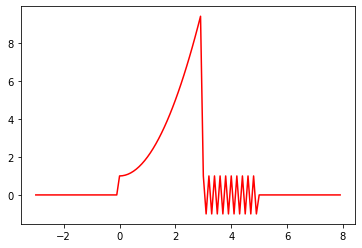

In [19]:
t=np.arange(-3, 8, 0.1)
function=piecewise(t)
fig, ax=plt.subplots()
ax.plot(t, function, color="red")